In [1]:
import nba_api
#BOSTON  id
id=1610612738
import pandas as pd
#調用函數“ League Game Finder”在nba 套件中進行API stats.endpoints 
from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
games = gamefinder.get_data_frames()[0] # [0] 抓取到的資料從list 改為 dataframe
print(games.shape)
games

(3495, 28)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42019,1610612738,BOS,Boston Celtics,0041900306,2020-09-27,BOS @ MIA,L,240,113,...,0.800,13,29,42,26,7,2,10,21,-12.0
1,42019,1610612738,BOS,Boston Celtics,0041900305,2020-09-25,BOS vs. MIA,W,238,121,...,0.862,13,37,50,29,7,4,11,23,13.0
2,42019,1610612738,BOS,Boston Celtics,0041900304,2020-09-23,BOS @ MIA,L,239,109,...,0.810,12,34,46,28,3,5,19,24,0.2
3,42019,1610612738,BOS,Boston Celtics,0041900303,2020-09-19,BOS @ MIA,W,240,117,...,0.867,10,40,50,27,8,3,14,29,8.4
4,42019,1610612738,BOS,Boston Celtics,0041900302,2020-09-17,BOS vs. MIA,L,240,101,...,0.792,6,35,41,19,5,3,20,22,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,21983,1610612738,BOS,Boston Celtics,0028300052,1983-11-05,BOS @ WAS,W,240,120,...,0.778,5,28,33,36,7,7,16,26,NaN
3491,21983,1610612738,BOS,Boston Celtics,0028300043,1983-11-04,BOS vs. IND,W,240,121,...,0.841,11,34,45,28,8,5,22,26,NaN
3492,21983,1610612738,BOS,Boston Celtics,0028300033,1983-11-02,BOS vs. MIL,W,240,119,...,0.816,14,24,38,26,7,7,18,18,NaN
3493,21983,1610612738,BOS,Boston Celtics,0028300019,1983-10-29,BOS @ CLE,W,240,108,...,0.690,13,31,44,25,12,7,13,22,NaN


In [2]:
#例行賽為每年7月開始, 季後賽取16隊每年4月開始 總決賽為每年6月
print(games[['SEASON_ID']].groupby(by="SEASON_ID").size())

SEASON_ID
12003     1
12004     3
12005     8
12006     8
12007     7
         ..
42015     6
42016    18
42017    19
42018     9
42019    17
Length: 81, dtype: int64


In [3]:
games.dtypes

SEASON_ID             object
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_NAME             object
GAME_ID               object
GAME_DATE             object
MATCHUP               object
WL                    object
MIN                    int64
PTS                    int64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                   int64
FG3A                   int64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PLUS_MINUS           float64
dtype: object

In [4]:
#去掉遺失值
games = games[games.loc[:,'PTS'] != 0]
games = games.dropna()

# 定義一個新的欄位 year (是哪一年的比賽嗎?)
games['year'] = games.SEASON_ID.str[1:5].astype(int)

# 定義一個新的欄位 Home (是主場嗎?)
games['Home'] = games.MATCHUP.str.len()>10

# 定義一個新的欄位 Player (對手是?)
games['Player'] = games.MATCHUP.str.rsplit(' ').str[-1]

#轉換日期 Object to date , 圖上的日期就會由舊往新排列
#games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])

games.to_csv("Bos.csv")
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,year,Home,Player
0,42019,1610612738,BOS,Boston Celtics,0041900306,2020-09-27,BOS @ MIA,L,240,113,...,42,26,7,2,10,21,-12.0,2019,False,MIA
1,42019,1610612738,BOS,Boston Celtics,0041900305,2020-09-25,BOS vs. MIA,W,238,121,...,50,29,7,4,11,23,13.0,2019,True,MIA
2,42019,1610612738,BOS,Boston Celtics,0041900304,2020-09-23,BOS @ MIA,L,239,109,...,46,28,3,5,19,24,0.2,2019,False,MIA
3,42019,1610612738,BOS,Boston Celtics,0041900303,2020-09-19,BOS @ MIA,W,240,117,...,50,27,8,3,14,29,8.4,2019,False,MIA
4,42019,1610612738,BOS,Boston Celtics,0041900302,2020-09-17,BOS vs. MIA,L,240,101,...,41,19,5,3,20,22,-5.0,2019,True,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,21996,1610612738,BOS,Boston Celtics,0029600066,1996-11-09,BOS @ CHI,L,238,92,...,46,14,9,2,26,24,-14.0,1996,False,CHI
2286,21996,1610612738,BOS,Boston Celtics,0029600053,1996-11-08,BOS vs. PHI,L,240,105,...,44,22,10,5,20,34,-10.0,1996,True,PHI
2287,21996,1610612738,BOS,Boston Celtics,0029600041,1996-11-06,BOS vs. IND,W,240,94,...,33,24,11,6,15,19,10.0,1996,True,IND
2288,21996,1610612738,BOS,Boston Celtics,0029600020,1996-11-02,BOS @ MIL,L,241,102,...,41,16,7,4,17,30,-22.0,1996,False,MIL


In [5]:
train = games[games['SEASON_ID']!='42019']
test = games[games['SEASON_ID']=='42019']
train.to_csv('train.csv') # for資料探索
test.to_csv('test.csv') # 季後賽得分預測
train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,year,Home,Player
17,22019,1610612738,BOS,Boston Celtics,0021901308,2020-08-13,BOS vs. WAS,L,240,90,...,51,22,8,7,18,19,-6.0,2019,True,WAS
18,22019,1610612738,BOS,Boston Celtics,0021901301,2020-08-11,BOS @ MEM,W,242,122,...,46,29,7,7,12,27,15.0,2019,False,MEM
19,22019,1610612738,BOS,Boston Celtics,0021901288,2020-08-09,BOS vs. ORL,W,266,122,...,54,32,9,7,12,19,3.0,2019,True,ORL
20,22019,1610612738,BOS,Boston Celtics,0021901279,2020-08-07,BOS @ TOR,W,240,122,...,52,27,8,2,14,22,22.0,2019,False,TOR
21,22019,1610612738,BOS,Boston Celtics,0021901267,2020-08-05,BOS vs. BKN,W,242,149,...,43,29,10,10,14,23,34.0,2019,True,BKN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,21996,1610612738,BOS,Boston Celtics,0029600066,1996-11-09,BOS @ CHI,L,238,92,...,46,14,9,2,26,24,-14.0,1996,False,CHI
2286,21996,1610612738,BOS,Boston Celtics,0029600053,1996-11-08,BOS vs. PHI,L,240,105,...,44,22,10,5,20,34,-10.0,1996,True,PHI
2287,21996,1610612738,BOS,Boston Celtics,0029600041,1996-11-06,BOS vs. IND,W,240,94,...,33,24,11,6,15,19,10.0,1996,True,IND
2288,21996,1610612738,BOS,Boston Celtics,0029600020,1996-11-02,BOS @ MIL,L,241,102,...,41,16,7,4,17,30,-22.0,1996,False,MIL


In [6]:
#加 MA_5(前五場平均得分)  and 前一筆得分(or FGM/FG3M/FTM)"FGA", "FG3A", "FTM", "FTA", "REB", "STL","BLK","TOV","PF"
import numpy as np
p=3
train = train.sort_values(by=['GAME_DATE']) #依時間排序
train["MA_5_PTS"] = np.round(train["PTS"].rolling(window =p,center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_FG_PCT"] = np.round(train["FG_PCT"].rolling(window =p, center = 
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_FGM"] = np.round(train["FGM"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_5_FGA"] = np.round(train["FGA"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_5_FG3M"] = np.round(train["FG3M"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_5_FG3A"] = np.round(train["FG3A"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_5_FTM"] = np.round(train["FTM"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_5_AST"] = np.round(train["AST"].rolling(window =p, center = 
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_PLUS_MINUS"] = np.round(train["PLUS_MINUS"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_REB"] = np.round(train["REB"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_STL"] = np.round(train["STL"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_BLK"] = np.round(train["BLK"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_TOV"] = np.round(train["TOV"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_PF"] = np.round(train["PF"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己

train["Last_PTS"] = train.PTS.shift() #往前一筆
train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FG3A,MA_5_FTM,MA_5_AST,MA_5_PLUS_MINUS,MA_5_REB,MA_5_STL,MA_5_BLK,MA_5_TOV,MA_5_PF,Last_PTS
2289,21996,1610612738,BOS,Boston Celtics,0029600001,1996-11-01,BOS vs. CHI,L,240,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2288,21996,1610612738,BOS,Boston Celtics,0029600020,1996-11-02,BOS @ MIL,L,241,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0
2287,21996,1610612738,BOS,Boston Celtics,0029600041,1996-11-06,BOS vs. IND,W,240,94,...,14.67,20.67,20.00,-7.00,36.67,9.33,4.00,16.67,27.33,102.0
2286,21996,1610612738,BOS,Boston Celtics,0029600053,1996-11-08,BOS vs. PHI,L,240,105,...,14.33,21.33,20.67,-7.33,39.33,9.33,5.00,17.33,27.67,94.0
2285,21996,1610612738,BOS,Boston Celtics,0029600066,1996-11-09,BOS @ CHI,L,238,92,...,16.00,16.00,20.00,-4.67,41.00,10.00,4.33,20.33,25.67,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,22019,1610612738,BOS,Boston Celtics,0021901267,2020-08-05,BOS vs. BKN,W,242,149,...,34.00,25.67,22.67,10.67,41.33,8.67,6.67,14.67,23.33,106.0
20,22019,1610612738,BOS,Boston Celtics,0021901279,2020-08-07,BOS @ TOR,W,240,122,...,39.33,21.00,23.67,16.67,46.67,8.33,5.33,14.67,23.67,149.0
19,22019,1610612738,BOS,Boston Celtics,0021901288,2020-08-09,BOS vs. ORL,W,266,122,...,41.67,20.33,29.33,19.67,49.67,9.00,6.33,13.33,21.33,122.0
18,22019,1610612738,BOS,Boston Celtics,0021901301,2020-08-11,BOS @ MEM,W,242,122,...,41.00,16.67,29.33,13.33,50.67,8.00,5.33,12.67,22.67,122.0


In [7]:
#依照對戰球隊和日期做排序(此加了 MA_5 and 前一筆得分(or FGM/FG3M/FTM))
import numpy as np

train = train.sort_values(by=['Player','GAME_DATE'])
train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FG3A,MA_5_FTM,MA_5_AST,MA_5_PLUS_MINUS,MA_5_REB,MA_5_STL,MA_5_BLK,MA_5_TOV,MA_5_PF,Last_PTS
2284,21996,1610612738,BOS,Boston Celtics,0029600089,1996-11-13,BOS vs. ATL,W,240,103,...,19.00,16.33,21.00,-2.00,44.67,10.33,3.67,22.67,26.33,92.0
2275,21996,1610612738,BOS,Boston Celtics,0029600226,1996-12-03,BOS @ ATL,L,239,95,...,13.00,12.67,16.33,-12.33,38.00,9.00,3.00,12.33,20.00,77.0
2251,21996,1610612738,BOS,Boston Celtics,0029600592,1997-01-25,BOS @ ATL,L,238,90,...,17.67,18.67,22.33,-4.00,41.67,14.00,5.00,14.67,25.33,117.0
2228,21996,1610612738,BOS,Boston Celtics,0029600876,1997-03-09,BOS vs. ATL,L,241,90,...,20.00,22.00,22.33,-12.00,40.33,6.67,3.33,16.67,22.00,102.0
2168,21997,1610612738,BOS,Boston Celtics,0029700581,1998-01-23,BOS @ ATL,W,241,89,...,17.00,13.00,19.67,-7.00,33.33,10.67,3.67,15.33,29.67,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,22018,1610612738,BOS,Boston Celtics,0021800931,2019-03-01,BOS vs. WAS,W,238,107,...,31.00,14.33,23.33,-5.67,44.67,7.67,3.67,14.00,19.33,92.0
111,22018,1610612738,BOS,Boston Celtics,0021801211,2019-04-09,BOS @ WAS,W,239,116,...,34.00,12.33,27.33,6.00,46.00,8.67,4.33,9.67,17.00,108.0
82,22019,1610612738,BOS,Boston Celtics,0021900156,2019-11-13,BOS vs. WAS,W,240,140,...,36.00,23.33,28.33,12.33,44.33,6.67,7.00,9.33,26.00,116.0
58,22019,1610612738,BOS,Boston Celtics,0021900542,2020-01-06,BOS @ WAS,L,240,94,...,27.00,19.33,20.67,1.67,51.00,8.67,6.67,15.67,19.33,111.0


In [8]:
train.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'year', 'Home',
       'Player', 'MA_5_PTS', 'MA_5_FG_PCT', 'MA_5_FGM', 'MA_5_FGA',
       'MA_5_FG3M', 'MA_5_FG3A', 'MA_5_FTM', 'MA_5_AST', 'MA_5_PLUS_MINUS',
       'MA_5_REB', 'MA_5_STL', 'MA_5_BLK', 'MA_5_TOV', 'MA_5_PF', 'Last_PTS'],
      dtype='object')

In [9]:
#MA_5_by_player為對戰此對手前五場的平均分數  Last_PTS_player為對戰此對手的上場分數
#'MA_5_PTS', 'MA_5_FG_PCT', 'MA_5_FGM', 'MA_5_FGA','MA_5_FG3M', 'MA_5_FG3A', 'MA_5_FTM', 'MA_5_AST', 'MA_5_PLUS_MINUS',
#'MA_5_REB', 'MA_5_STL', 'MA_5_BLK', 'MA_5_TOV', 'MA_5_PF'
train["MA_5_PTS_by_player"] = np.round(train["PTS"].rolling(window =p, center =False  ).mean(),2) #往前五筆含自己
train["MA_5_FG_PCT_by_player"] = np.round(train["FG_PCT"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己
train["MA_5_FGM_by_player"] = np.round(train["FGM"].rolling(window =p, center = False  ).mean(),2)
train["MA_5_FGA_by_player"] = np.round(train["FGA"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_5_FG3M_by_player"] = np.round(train["FG3M"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_5_FG3A_by_player"] = np.round(train["FG3A"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_5_FTM_by_player"] = np.round(train["FTM"].rolling(window =p, center =
                       False  ).mean(),2)

train["MA_5_AST_by_player"] = np.round(train["AST"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己
train["MA_5_PLUS_MINUS_by_player"] = np.round(train["PLUS_MINUS"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己

train["MA_5_REB_by_player"] = np.round(train["REB"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_STL_by_player"] = np.round(train["STL"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_BLK_by_player"] = np.round(train["BLK"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_TOV_by_player"] = np.round(train["TOV"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_5_PF_by_player"] = np.round(train["PF"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己

train["Last_PTS_player"] = train.PTS.shift() #往前一筆
train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FG3A_by_player,MA_5_FTM_by_player,MA_5_AST_by_player,MA_5_PLUS_MINUS_by_player,MA_5_REB_by_player,MA_5_STL_by_player,MA_5_BLK_by_player,MA_5_TOV_by_player,MA_5_PF_by_player,Last_PTS_player
2284,21996,1610612738,BOS,Boston Celtics,0029600089,1996-11-13,BOS vs. ATL,W,240,103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2275,21996,1610612738,BOS,Boston Celtics,0029600226,1996-12-03,BOS @ ATL,L,239,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0
2251,21996,1610612738,BOS,Boston Celtics,0029600592,1997-01-25,BOS @ ATL,L,238,90,...,17.00,14.00,20.00,1.00,37.67,10.33,3.33,18.00,19.67,95.0
2228,21996,1610612738,BOS,Boston Celtics,0029600876,1997-03-09,BOS vs. ATL,L,241,90,...,16.33,16.00,18.33,-13.00,37.00,9.67,3.00,19.33,20.67,90.0
2168,21997,1610612738,BOS,Boston Celtics,0029700581,1998-01-23,BOS @ ATL,W,241,89,...,16.33,16.00,19.00,-8.33,35.00,11.33,2.67,18.00,23.33,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,22018,1610612738,BOS,Boston Celtics,0021800931,2019-03-01,BOS vs. WAS,W,238,107,...,35.33,20.00,22.67,1.33,46.67,10.67,2.00,13.67,18.33,130.0
111,22018,1610612738,BOS,Boston Celtics,0021801211,2019-04-09,BOS @ WAS,W,239,116,...,39.00,16.33,24.33,7.33,48.67,9.33,2.67,10.00,18.00,107.0
82,22019,1610612738,BOS,Boston Celtics,0021900156,2019-11-13,BOS vs. WAS,W,240,140,...,38.33,16.67,28.33,8.00,46.67,9.00,3.67,9.33,20.33,116.0
58,22019,1610612738,BOS,Boston Celtics,0021900542,2020-01-06,BOS @ WAS,L,240,94,...,39.00,19.00,25.33,2.67,49.67,7.33,5.33,10.67,21.00,140.0


In [10]:
train = train.sort_values(by=['GAME_DATE'],ascending=False)


In [11]:
train.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'year', 'Home',
       'Player', 'MA_5_PTS', 'MA_5_FG_PCT', 'MA_5_FGM', 'MA_5_FGA',
       'MA_5_FG3M', 'MA_5_FG3A', 'MA_5_FTM', 'MA_5_AST', 'MA_5_PLUS_MINUS',
       'MA_5_REB', 'MA_5_STL', 'MA_5_BLK', 'MA_5_TOV', 'MA_5_PF', 'Last_PTS',
       'MA_5_PTS_by_player', 'MA_5_FG_PCT_by_player', 'MA_5_FGM_by_player',
       'MA_5_FGA_by_player', 'MA_5_FG3M_by_player', 'MA_5_FG3A_by_player',
       'MA_5_FTM_by_player', 'MA_5_AST_by_player', 'MA_5_PLUS_MINUS_by_player',
       'MA_5_REB_by_player', 'MA_5_STL_by_player', 'MA_5_BLK_by_player',
       'MA_5_TOV_by_player', 'MA_5_PF_by_player', 'Last_PTS_player'],
      dtype='object')

In [12]:
train[['PTS', 'MA_5_PTS', 'MA_5_FG_PCT', 'MA_5_FGM', 'MA_5_FGA',
       'MA_5_FG3M', 'MA_5_FG3A', 'MA_5_FTM', 'MA_5_AST', 'MA_5_PLUS_MINUS',
       'MA_5_REB', 'MA_5_STL', 'MA_5_BLK', 'MA_5_TOV', 'MA_5_PF', 'Last_PTS',
       'MA_5_PTS_by_player', 'MA_5_FG_PCT_by_player', 'MA_5_FGM_by_player',
       'MA_5_FGA_by_player', 'MA_5_FG3M_by_player', 'MA_5_FG3A_by_player',
       'MA_5_FTM_by_player', 'MA_5_AST_by_player', 'MA_5_PLUS_MINUS_by_player',
       'MA_5_REB_by_player', 'MA_5_STL_by_player', 'MA_5_BLK_by_player',
       'MA_5_TOV_by_player', 'MA_5_PF_by_player', 'Last_PTS_player',
       'MA_5_FG3M_by_player' ]].corr()

,PTS,MA_5_PTS,MA_5_FG_PCT,MA_5_FGM,MA_5_FGA,MA_5_FG3M,MA_5_FG3A,MA_5_FTM,MA_5_AST,MA_5_PLUS_MINUS,...,MA_5_FTM_by_player,MA_5_AST_by_player,MA_5_PLUS_MINUS_by_player,MA_5_REB_by_player,MA_5_STL_by_player,MA_5_BLK_by_player,MA_5_TOV_by_player,MA_5_PF_by_player,Last_PTS_player,MA_5_FG3M_by_player
PTS,1.000000,0.707997,0.382646,0.607400,0.380583,0.417319,0.322824,0.149937,0.461525,0.334793,...,0.149362,0.447475,0.330484,0.242954,0.092276,0.068365,-0.058603,0.007776,0.217708,0.415272
MA_5_PTS,0.707997,1.000000,0.545686,0.862747,0.537631,0.593432,0.454999,0.199794,0.654366,0.447176,...,0.053170,0.372826,0.215132,0.233734,0.030887,0.051009,-0.103590,-0.057448,0.272860,0.461048
MA_5_FG_PCT,0.382646,0.545686,1.000000,0.648335,-0.194376,0.112051,-0.133662,-0.064761,0.543753,0.508142,...,0.020724,0.258973,0.278418,-0.084106,-0.071391,0.094512,0.052236,-0.013011,0.081488,0.027320
MA_5_FGM,0.607400,0.862747,0.648335,1.000000,0.614099,0.408288,0.280931,-0.227487,0.743643,0.402564,...,-0.131198,0.393899,0.191452,0.199184,0.051887,0.058794,-0.100730,-0.075044,0.215155,0.315574
MA_5_FGA,0.380583,0.537631,-0.194376,0.614099,1.000000,0.393561,0.486122,-0.228275,0.394750,-0.014292,...,-0.186105,0.235206,-0.044897,0.341611,0.142577,-0.022485,-0.182718,-0.079106,0.187665,0.362680
MA_5_FG3M,0.417319,0.593432,0.112051,0.408288,0.393561,1.000000,0.890369,-0.169549,0.362772,0.295109,...,-0.155243,0.247351,0.154371,0.228548,-0.069859,0.010932,-0.225863,-0.255757,0.224108,0.753633
MA_5_FG3A,0.322824,0.454999,-0.133662,0.280931,0.486122,0.890369,1.000000,-0.161986,0.243957,0.146377,...,-0.175574,0.214860,0.085078,0.282375,-0.062783,-0.016398,-0.265047,-0.280674,0.234238,0.749470
MA_5_FTM,0.149937,0.199794,-0.064761,-0.227487,-0.228275,-0.169549,-0.161986,1.000000,-0.184317,0.035952,...,0.480025,-0.079881,0.012115,-0.015576,0.024692,-0.003053,0.122862,0.200966,0.046111,-0.111615
MA_5_AST,0.461525,0.654366,0.543753,0.743643,0.394750,0.362772,0.243957,-0.184317,1.000000,0.381266,...,-0.088808,0.496120,0.174676,0.088344,0.019084,0.019742,-0.088438,-0.070994,0.131972,0.243699
MA_5_PLUS_MINUS,0.334793,0.447176,0.508142,0.402564,-0.014292,0.295109,0.146377,0.035952,0.381266,1.000000,...,0.033474,0.195941,0.467442,0.162298,0.022595,0.093194,-0.092204,-0.096770,0.086119,0.182956


In [13]:
#檢查遺失值
train.isnull().sum(),train.shape

(SEASON_ID             0
 TEAM_ID               0
 TEAM_ABBREVIATION     0
 TEAM_NAME             0
 GAME_ID               0
                      ..
 MA_5_STL_by_player    2
 MA_5_BLK_by_player    2
 MA_5_TOV_by_player    2
 MA_5_PF_by_player     2
 Last_PTS_player       1
 Length: 61, dtype: int64,
 (2246, 61))

In [14]:
#因為有四個變數有遺漏值，故需再補上
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')
# 依照策略strategy採用mean 或 median填補資料
train.iloc[:,31:63] = imr.fit_transform(train.iloc[:,31:63])
# 確認
train[-20:]


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FG3A_by_player,MA_5_FTM_by_player,MA_5_AST_by_player,MA_5_PLUS_MINUS_by_player,MA_5_REB_by_player,MA_5_STL_by_player,MA_5_BLK_by_player,MA_5_TOV_by_player,MA_5_PF_by_player,Last_PTS_player
2270,21996,1610612738,BOS,Boston Celtics,0029600304,1996-12-13,BOS @ IND,L,241,94,...,20.33,16.33,20.67,-6.00,39.00,9.33,4.67,15.67,24.67,94.0
2271,21996,1610612738,BOS,Boston Celtics,0029600286,1996-12-11,BOS vs. TOR,W,316,115,...,16.33,20.67,26.33,13.00,49.67,5.67,5.67,9.33,20.33,111.0
2272,21996,1610612738,BOS,Boston Celtics,0029600268,1996-12-08,BOS @ MIL,L,241,87,...,19.00,24.33,16.33,-13.67,39.33,8.33,4.33,17.00,24.67,102.0
2273,21996,1610612738,BOS,Boston Celtics,0029600248,1996-12-06,BOS vs. NJN,L,266,108,...,19.33,23.33,26.33,13.67,47.67,11.33,5.00,13.33,23.00,124.0
2274,21996,1610612738,BOS,Boston Celtics,0029600238,1996-12-04,BOS @ HOU,L,241,89,...,21.00,15.67,22.00,-5.33,42.67,11.67,4.00,15.33,23.67,94.0
2275,21996,1610612738,BOS,Boston Celtics,0029600226,1996-12-03,BOS @ ATL,L,239,95,...,19.33,18.00,22.00,1.33,41.33,8.33,4.33,14.33,22.33,103.0
2276,21996,1610612738,BOS,Boston Celtics,0029600212,1996-11-30,BOS @ MIA,L,240,77,...,26.00,14.67,25.33,12.67,44.33,9.00,6.33,9.67,20.33,122.0
2277,21996,1610612738,BOS,Boston Celtics,0029600199,1996-11-29,BOS vs. HOU,L,241,94,...,27.00,16.67,23.00,-2.00,43.67,11.33,3.67,15.00,23.00,119.0
2278,21996,1610612738,BOS,Boston Celtics,0029600187,1996-11-27,BOS vs. LAL,W,240,110,...,32.33,21.33,24.33,7.00,50.67,9.33,3.33,15.00,24.33,141.0
2279,21996,1610612738,BOS,Boston Celtics,0029600169,1996-11-24,BOS vs. DAL,W,241,105,...,27.33,20.33,22.67,10.67,42.00,7.00,7.67,14.33,22.67,112.0


In [15]:
#檢查遺失值
train.isnull().sum(),train.shape

(SEASON_ID             0
 TEAM_ID               0
 TEAM_ABBREVIATION     0
 TEAM_NAME             0
 GAME_ID               0
                      ..
 MA_5_STL_by_player    0
 MA_5_BLK_by_player    0
 MA_5_TOV_by_player    0
 MA_5_PF_by_player     0
 Last_PTS_player       0
 Length: 61, dtype: int64,
 (2246, 61))

In [16]:
#主客場欄位改成0,1
train['Home'] = train['Home'].astype(int)
train['Home']

17      1
18      0
19      1
20      0
21      1
       ..
2285    0
2286    1
2287    1
2288    0
2289    1
Name: Home, Length: 2246, dtype: int32

# RFE 篩選


In [17]:
# add SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
y = train['PTS']
# 放入可能的特徵欄位...應該可以多放一些, 除了FGM/FGM3/FTM
cols = ['MA_5_PTS', 'MA_5_FG_PCT', 'MA_5_FGM', 'MA_5_FGA',
       'MA_5_FG3M', 'MA_5_FG3A', 'MA_5_FTM', 'MA_5_AST', 'MA_5_PLUS_MINUS',
       'MA_5_REB', 'MA_5_STL', 'MA_5_BLK', 'MA_5_TOV', 'MA_5_PF', 'Last_PTS',
       'MA_5_PTS_by_player', 'MA_5_FG_PCT_by_player', 'MA_5_FGM_by_player',
       'MA_5_FGA_by_player', 'MA_5_FG3M_by_player', 'MA_5_FG3A_by_player',
       'MA_5_FTM_by_player', 'MA_5_AST_by_player', 'MA_5_PLUS_MINUS_by_player',
       'MA_5_REB_by_player', 'MA_5_STL_by_player', 'MA_5_BLK_by_player',
       'MA_5_TOV_by_player', 'MA_5_PF_by_player', 'Last_PTS_player',
       'MA_5_FG3M_by_player' ]
X = train[cols]


In [18]:
import sklearn
from sklearn.feature_selection import RFE
n_features_optimal = 1

lm = LinearRegression()
lm.fit(X, y)

rfe = RFE(lm, n_features_to_select = n_features_optimal)             
rfe = rfe.fit(X, y)
print(rfe)


RFE(estimator=LinearRegression(), n_features_to_select=1)


In [19]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [20]:
rfe.ranking_  ,cols

(array([ 3,  1,  4, 18,  6, 31,  5, 22, 21, 29, 28, 27, 14, 20,  8,  7,  2,
        10, 25,  9, 16, 12, 17, 24, 26, 30, 19, 15, 23, 13, 11]),
 ['MA_5_PTS',
  'MA_5_FG_PCT',
  'MA_5_FGM',
  'MA_5_FGA',
  'MA_5_FG3M',
  'MA_5_FG3A',
  'MA_5_FTM',
  'MA_5_AST',
  'MA_5_PLUS_MINUS',
  'MA_5_REB',
  'MA_5_STL',
  'MA_5_BLK',
  'MA_5_TOV',
  'MA_5_PF',
  'Last_PTS',
  'MA_5_PTS_by_player',
  'MA_5_FG_PCT_by_player',
  'MA_5_FGM_by_player',
  'MA_5_FGA_by_player',
  'MA_5_FG3M_by_player',
  'MA_5_FG3A_by_player',
  'MA_5_FTM_by_player',
  'MA_5_AST_by_player',
  'MA_5_PLUS_MINUS_by_player',
  'MA_5_REB_by_player',
  'MA_5_STL_by_player',
  'MA_5_BLK_by_player',
  'MA_5_TOV_by_player',
  'MA_5_PF_by_player',
  'Last_PTS_player',
  'MA_5_FG3M_by_player'])

In [21]:
cols =np.array(cols)
cols
cols[rfe.support_]


array(['MA_5_FG_PCT'], dtype='<U25')

In [22]:
a = pd.DataFrame(rfe.ranking_ ,cols,columns=['rank'])
a

,rank
MA_5_PTS,3
MA_5_FG_PCT,1
MA_5_FGM,4
MA_5_FGA,18
MA_5_FG3M,6
MA_5_FG3A,31
MA_5_FTM,5
MA_5_AST,22
MA_5_PLUS_MINUS,21
MA_5_REB,29


In [23]:
#"MA_5_FGM_by_player", "MA_5_FG3M_by_player","MA_5_FTM_by_player","MA_5_PTS_by_player", "MA_5_FGM", "MA_5_FTM", 'MA_5_FG3M', "MA_5_PTS", "MA_5_FG_PCT","MA_5_FG3M_by_player"

# Step4 :特徵工程 分類變數轉連續變數 獨熱編碼 標籤編碼 有序編碼¶

In [24]:
train["Player"].unique()

array(['WAS', 'MEM', 'ORL', 'TOR', 'BKN', 'MIA', 'POR', 'MIL', 'HOU',
       'PHX', 'OKC', 'IND', 'UTA', 'CLE', 'LAL', 'MIN', 'LAC', 'ATL',
       'PHI', 'GSW', 'NOP', 'DET', 'CHI', 'SAS', 'CHA', 'DAL', 'DEN',
       'NYK', 'SAC', 'RMD', 'MLN', 'NOH', 'EAM', 'FBU', 'NJN', 'SEA',
       'NOK', 'CHH', 'VAN'], dtype=object)

In [25]:
Player_mapping ={'WAS':1, 'MEM':2, 'ORL':3, 'TOR':4, 'BKN':5, 'MIA':6, 'POR':7, 'MIL':8, 'HOU':9,
       'PHX':10, 'OKC':11, 'IND':12, 'UTA':13, 'CLE':14, 'LAL':15, 'MIN':16, 'LAC':17, 'ATL':18,
       'PHI':19, 'GSW':20, 'NOP':21, 'DET':22, 'CHI':23, 'SAS':24, 'CHA':25, 'DAL':26, 'DEN':27,
       'NYK':28, 'SAC':29, 'RMD':30, 'MLN':31, 'NOH':32, 'EAM':33, 'FBU':34, 'NJN':35, 'SEA':36,
       'NOK':37, 'CHH':38, 'VAN':39}
# 將'Player" 轉換成有序編碼
train ['Player'] = train ['Player'].map(Player_mapping)
train


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FG3A_by_player,MA_5_FTM_by_player,MA_5_AST_by_player,MA_5_PLUS_MINUS_by_player,MA_5_REB_by_player,MA_5_STL_by_player,MA_5_BLK_by_player,MA_5_TOV_by_player,MA_5_PF_by_player,Last_PTS_player
17,22019,1610612738,BOS,Boston Celtics,0021901308,2020-08-13,BOS vs. WAS,L,240,90,...,36.00,19.33,23.67,-1.33,50.00,6.67,6.67,15.00,21.67,94.0
18,22019,1610612738,BOS,Boston Celtics,0021901301,2020-08-11,BOS @ MEM,W,242,122,...,35.67,17.33,24.33,10.73,44.33,8.33,6.67,11.67,22.33,119.0
19,22019,1610612738,BOS,Boston Celtics,0021901288,2020-08-09,BOS vs. ORL,W,266,122,...,32.67,15.33,27.33,10.00,46.33,9.67,6.67,12.33,19.33,116.0
20,22019,1610612738,BOS,Boston Celtics,0021901279,2020-08-07,BOS @ TOR,W,240,122,...,37.00,17.33,23.67,7.33,42.67,8.67,3.00,15.67,20.33,97.0
21,22019,1610612738,BOS,Boston Celtics,0021901267,2020-08-05,BOS vs. BKN,W,242,149,...,38.67,20.67,23.00,6.67,44.33,10.33,7.67,16.00,22.33,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,21996,1610612738,BOS,Boston Celtics,0029600066,1996-11-09,BOS @ CHI,L,238,92,...,19.00,17.67,16.00,-12.00,41.67,8.67,2.33,20.00,26.67,98.0
2286,21996,1610612738,BOS,Boston Celtics,0029600053,1996-11-08,BOS vs. PHI,L,240,105,...,27.33,15.67,25.67,3.00,46.33,9.67,6.00,14.67,24.00,122.0
2287,21996,1610612738,BOS,Boston Celtics,0029600041,1996-11-06,BOS vs. IND,W,240,94,...,29.00,16.67,22.33,-5.33,45.00,10.33,5.00,16.67,22.33,112.0
2288,21996,1610612738,BOS,Boston Celtics,0029600020,1996-11-02,BOS @ MIL,L,241,102,...,27.00,25.00,18.33,-6.67,44.67,6.33,5.33,15.67,26.00,106.0


In [26]:
#4.將"WL"做編碼
size_mapping = {'W': 1,'L': 0}

train['Last_WL'] = train['WL'].shift().map(size_mapping) # code26修改為前一場的輸贏
train
imr = SimpleImputer(missing_values=np.nan, strategy='median')
# 依照策略strategy採用mean 或 median填補資料
train.iloc[:,-1:] = imr.fit_transform(train.iloc[:,-1:])

In [27]:
print(train.dtypes)

SEASON_ID              object
TEAM_ID                 int64
TEAM_ABBREVIATION      object
TEAM_NAME              object
GAME_ID                object
                       ...   
MA_5_BLK_by_player    float64
MA_5_TOV_by_player    float64
MA_5_PF_by_player     float64
Last_PTS_player       float64
Last_WL               float64
Length: 62, dtype: object


In [28]:
train['GAME_ID'] = train['GAME_ID'].astype(int)
train['GAME_ID']

test['GAME_ID'] = test['GAME_ID'].astype(int)
test['GAME_ID']

c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0     41900306
1     41900305
2     41900304
3     41900303
4     41900302
5     41900301
6     41900217
7     41900216
8     41900215
9     41900214
10    41900213
11    41900212
12    41900211
13    41900124
14    41900123
15    41900122
16    41900121
Name: GAME_ID, dtype: int32

In [29]:
train['SEASON_ID'] = train['SEASON_ID'].astype(int)
train['SEASON_ID']

test['SEASON_ID'] = test['SEASON_ID'].astype(int)
test['SEASON_ID']


c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0     42019
1     42019
2     42019
3     42019
4     42019
5     42019
6     42019
7     42019
8     42019
9     42019
10    42019
11    42019
12    42019
13    42019
14    42019
15    42019
16    42019
Name: SEASON_ID, dtype: int32

# 合併DataFrame

In [30]:

#調整欄位位置
parts = train[["PTS",'GAME_ID',"Player","year" ,"Home","Last_WL", "MA_5_FGM_by_player", "MA_5_FG3M_by_player",
               "MA_5_FTM_by_player", "MA_5_FGM", "MA_5_FTM", 'MA_5_FG3M' ]]
# 與 Dummy New_columns合併
totaldata = pd.concat([parts], axis=1)# 左右合併
totaldata.shape


(2246, 12)

In [31]:
print(totaldata.dtypes)

PTS                      int64
GAME_ID                  int32
Player                   int64
year                     int32
Home                     int32
Last_WL                float64
MA_5_FGM_by_player     float64
MA_5_FG3M_by_player    float64
MA_5_FTM_by_player     float64
MA_5_FGM               float64
MA_5_FTM               float64
MA_5_FG3M              float64
dtype: object


In [32]:
#檢查遺失值
totaldata.isnull().sum(),train.shape

(PTS                    0
 GAME_ID                0
 Player                 0
 year                   0
 Home                   0
 Last_WL                0
 MA_5_FGM_by_player     0
 MA_5_FG3M_by_player    0
 MA_5_FTM_by_player     0
 MA_5_FGM               0
 MA_5_FTM               0
 MA_5_FG3M              0
 dtype: int64,
 (2246, 62))

# step5:build regression model

In [33]:
# build regression model 

y = totaldata.iloc[:,0 ]
X = totaldata.iloc[:,2: ]

#加載用於線性回歸的套件
from sklearn.linear_model import LinearRegression

#分拆數據集 for train valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42 ) #Randomstate(隨機起始值)


#創建線性回歸
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)
#顯示截距 / 斜率 /  R2 score / 欄位名稱 
print(lin_mod.intercept_)
print(lin_mod.coef_)
print(lin_mod.score(X_train,y_train))
X.columns

49.678570745707205
[-0.00490176 -0.03859624  1.24356659  0.12084728  1.2654754   0.32458819
  0.65684702  1.29087739  0.66307737  0.82342556]
0.6014554393401943


Index(['Player', 'year', 'Home', 'Last_WL', 'MA_5_FGM_by_player',
       'MA_5_FG3M_by_player', 'MA_5_FTM_by_player', 'MA_5_FGM', 'MA_5_FTM',
       'MA_5_FG3M'],
      dtype='object')

In [34]:
# Valid data 的 R2
lin_mod.score(X_valid, y_valid)

0.6805163714782481

In [35]:
#做成表格
#修改資料呈現方式
import numpy as np
np.set_printoptions(suppress=True) # 科學記號改為一般顯示方式

new_coef= pd.DataFrame(lin_mod.coef_,X.columns, columns=['coef']) 
new_coef

,coef
Player,-0.004902
year,-0.038596
Home,1.243567
Last_WL,0.120847
MA_5_FGM_by_player,1.265475
MA_5_FG3M_by_player,0.324588
MA_5_FTM_by_player,0.656847
MA_5_FGM,1.290877
MA_5_FTM,0.663077
MA_5_FG3M,0.823426


,coef
MA_5_FGM,1.290877
MA_5_FGM_by_player,1.265475
Home,1.243567
MA_5_FG3M,0.823426
MA_5_FTM,0.663077
MA_5_FTM_by_player,0.656847
MA_5_FG3M_by_player,0.324588
Last_WL,0.120847
Player,-0.004902
year,-0.038596


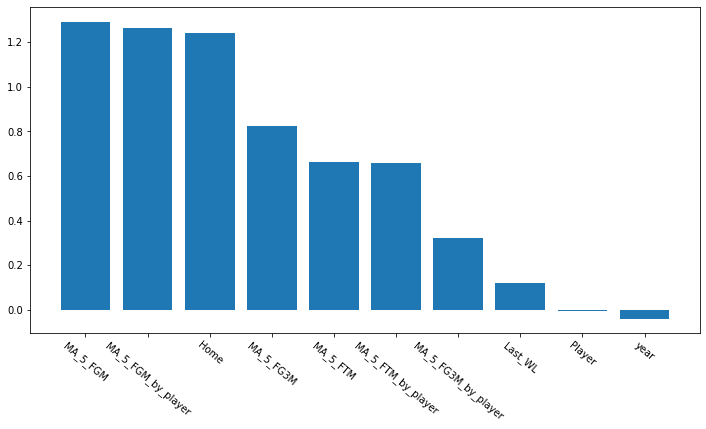

In [36]:
import matplotlib.pyplot as plt  
# 使用DateFrame方式進行排序
new_coef_sort = new_coef.sort_values(by='coef', ascending=False)
# 畫圖 從高到低 去畫出 特徵重要性
plt.figure(figsize=(12, 6))
plt.bar(new_coef_sort.index , new_coef_sort['coef'])
plt.xticks(rotation=-40)
new_coef_sort

In [37]:
# Step 6: Measures for Cross Evaluation

In [38]:
# Indexes for model
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = 1 -  (1 - r2) * (y_true.shape[0] - 1)/(y_true.shape[0] - n_parameters)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_hat = lin_mod.predict(X_valid) 
print_metrics(y_valid, y_hat, 10)   

Mean Square Error      = 53.11147746774633
Root Mean Square Error = 7.287762171458831
Mean Absolute Error    = 5.869757915267453
Median Absolute Error  = 5.038337971426472
R^2                    = 0.6805163714782481
Adjusted R^2           = 0.6739814790766667


In [39]:
# 考慮最近的 500資料來預測 2019 季後賽的77場
# 建立模型必須要用 train data 來建立

In [40]:
from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X_train, y_train)
reg = LinearRegression().fit(X_train[:500], y_train[:500]) # code40 建立模型必須要用 train data 來建立
reg.coef_, reg.intercept_
predict = reg.predict(X)[:77]
answer = y[:77]
print(predict , answer)

[114.71420384 120.76032051 131.29931709 124.95912123 134.46337786
 115.61045182 118.91194399 117.97842297 107.63191518 110.04026783
 100.64319678 110.91387066 111.08525343 106.50668938 117.56532297
 120.61806245 116.92793608 113.45100309 111.58544989 129.08303926
 127.02973868 124.63853469 113.21561926 118.69690067 121.90897529
 115.79567103 124.73801033 114.92728038 117.37947472 112.87722518
 118.60268684 118.04932027 123.41570535 134.32952436 113.83735799
 114.14390574 118.30833993 121.75649082 124.62414908 100.42197242
 113.34223166 110.35016362 114.60285757 114.51223289 111.90621767
 116.41832466 125.37546598 116.69367088 115.83855511 113.35052687
 112.25312885 110.6266059  114.69778978 116.06549613 108.2594912
 115.94977404 114.57250729 111.35920673 109.03553373 106.15222077
  96.90378892 105.73556391 102.89567316 116.60370106 120.8502092
 133.20266431 117.32026867 121.16971258 110.25182038 117.75569858
 115.74657234 116.0267024  113.36930099 111.00303958 107.34350885
 112.2056281

In [41]:
import numpy as np
a=np.transpose(np.vstack([answer, predict, (answer-predict)])).round()
a

array([[ 90., 115., -25.],
       [122., 121.,   1.],
       [122., 131.,  -9.],
       [122., 125.,  -3.],
       [149., 134.,  15.],
       [106., 116., -10.],
       [128., 119.,   9.],
       [112., 118.,  -6.],
       [112., 108.,   4.],
       [117., 110.,   7.],
       [ 84., 101., -17.],
       [114., 111.,   3.],
       [104., 111.,  -7.],
       [ 94., 107., -13.],
       [112., 118.,  -6.],
       [120., 121.,  -1.],
       [110., 117.,  -7.],
       [114., 113.,   1.],
       [118., 112.,   6.],
       [112., 129., -17.],
       [127., 127.,  -0.],
       [141., 125.,  16.],
       [105., 113.,  -8.],
       [112., 119.,  -7.],
       [112., 122., -10.],
       [116., 116.,   0.],
       [123., 125.,  -2.],
       [116., 115.,   1.],
       [119., 117.,   2.],
       [109., 113.,  -4.],
       [108., 119., -11.],
       [109., 118.,  -9.],
       [119., 123.,  -4.],
       [139., 134.,   5.],
       [119., 114.,   5.],
       [123., 114.,   9.],
       [103., 118., -15.],
 

In [42]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE test:', mean_squared_error(answer, predict))
print('R^2 test:',r2_score(answer, predict))

MSE test: 75.00242651629277
R^2 test: 0.472995704207958


c:\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

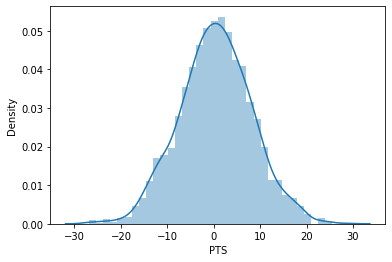

In [43]:
import seaborn as sns
sns.distplot((reg.predict(X) - y))
plt.show


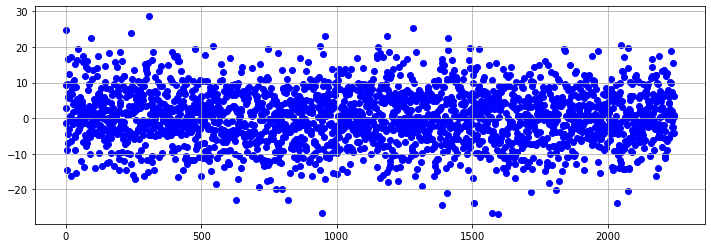

In [44]:
#residuals
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.grid()
plt.scatter(np.arange(len(X)), (reg.predict(X) - y), color='blue')
plt.show()

In [45]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_hat = reg.predict(X) 
print_metrics(y, y_hat, 1)       

Mean Square Error      = 61.080090007806255
Root Mean Square Error = 7.8153752314144365
Mean Absolute Error    = 6.1759069536053115
Median Absolute Error  = 5.045021153599919
R^2                    = 0.6080756318228948
Adjusted R^2           = 0.6080756318228948


# 接下來要處理test data 請自己寫寫看

In [46]:
#加 MA_5(前五場平均得分)  and 前一筆得分(or FGM/FG3M/FTM)"FGA", "FG3A", "FTM", "FTA", "REB", "STL","BLK","TOV","PF"
import numpy as np
p=3
test = test.sort_values(by=['GAME_DATE']) #依時間排序
test["MA_5_PTS"] = np.round(test["PTS"].rolling(window =p,center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_FG_PCT"] = np.round(test["FG_PCT"].rolling(window =p, center = 
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_FGM"] = np.round(test["FGM"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_5_FGA"] = np.round(test["FGA"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_5_FG3M"] = np.round(test["FG3M"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_5_FG3A"] = np.round(test["FG3A"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_5_FTM"] = np.round(test["FTM"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_5_AST"] = np.round(test["AST"].rolling(window =p, center = 
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_PLUS_MINUS"] = np.round(test["PLUS_MINUS"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_REB"] = np.round(test["REB"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_STL"] = np.round(test["STL"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_BLK"] = np.round(test["BLK"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_TOV"] = np.round(test["TOV"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_PF"] = np.round(test["PF"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己

test["Last_PTS"] = test.PTS.shift() #往前一筆
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FG3A,MA_5_FTM,MA_5_AST,MA_5_PLUS_MINUS,MA_5_REB,MA_5_STL,MA_5_BLK,MA_5_TOV,MA_5_PF,Last_PTS
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,35.00,22.00,19.00,14.33,43.67,7.67,5.67,7.67,24.00,128.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,36.33,21.67,18.00,13.00,43.33,5.00,6.00,10.00,25.33,102.0
12,42019,1610612738,BOS,Boston Celtics,41900211,2020-08-30,BOS @ TOR,W,240,112,...,35.00,20.33,19.67,10.00,45.67,6.33,5.67,15.33,23.33,110.0
11,42019,1610612738,BOS,Boston Celtics,41900212,2020-09-01,BOS @ TOR,W,241,102,...,37.33,20.67,20.67,8.33,45.33,6.00,6.00,17.67,22.33,112.0
10,42019,1610612738,BOS,Boston Celtics,41900213,2020-09-03,BOS vs. TOR,L,239,103,...,35.33,18.67,21.33,6.67,46.00,6.67,6.67,17.67,19.33,102.0
9,42019,1610612738,BOS,Boston Celtics,41900214,2020-09-05,BOS vs. TOR,L,240,93,...,34.00,19.67,19.00,-1.67,44.33,6.00,6.00,15.00,18.67,103.0
8,42019,1610612738,BOS,Boston Celtics,41900215,2020-09-07,BOS @ TOR,W,238,111,...,32.67,20.00,20.67,4.67,44.67,5.67,5.00,13.00,18.33,93.0
7,42019,1610612738,BOS,Boston Celtics,41900216,2020-09-09,BOS vs. TOR,L,290,122,...,38.33,19.67,24.33,4.00,49.33,5.33,4.00,13.33,21.33,111.0


In [47]:
#依照對戰球隊和日期做排序(此加了 MA_5 and 前一筆得分(or FGM/FG3M/FTM))
import numpy as np

test = test.sort_values(by=['Player','GAME_DATE'])
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FG3A,MA_5_FTM,MA_5_AST,MA_5_PLUS_MINUS,MA_5_REB,MA_5_STL,MA_5_BLK,MA_5_TOV,MA_5_PF,Last_PTS
5,42019,1610612738,BOS,Boston Celtics,41900301,2020-09-15,BOS vs. MIA,L,264,114,...,42.00,16.33,25.00,-0.40,46.33,8.67,5.00,11.67,22.00,92.0
4,42019,1610612738,BOS,Boston Celtics,41900302,2020-09-17,BOS vs. MIA,L,240,101,...,36.00,17.67,20.67,-1.07,40.67,8.67,4.67,13.33,21.00,114.0
3,42019,1610612738,BOS,Boston Celtics,41900303,2020-09-19,BOS @ MIA,W,240,117,...,32.00,22.00,23.33,0.07,42.67,7.33,4.00,14.67,25.33,101.0
2,42019,1610612738,BOS,Boston Celtics,41900304,2020-09-23,BOS @ MIA,L,239,109,...,31.33,20.67,24.67,1.20,45.67,5.33,3.67,17.67,25.00,117.0
1,42019,1610612738,BOS,Boston Celtics,41900305,2020-09-25,BOS vs. MIA,W,238,121,...,34.67,22.67,28.00,7.20,48.67,6.00,4.00,14.67,25.33,109.0
0,42019,1610612738,BOS,Boston Celtics,41900306,2020-09-27,BOS @ MIA,L,240,113,...,41.33,18.00,27.67,0.40,46.00,5.67,3.67,13.33,22.67,121.0
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,35.00,22.00,19.00,14.33,43.67,7.67,5.67,7.67,24.00,128.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,36.33,21.67,18.00,13.00,43.33,5.00,6.00,10.00,25.33,102.0


In [48]:
test.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'year', 'Home',
       'Player', 'MA_5_PTS', 'MA_5_FG_PCT', 'MA_5_FGM', 'MA_5_FGA',
       'MA_5_FG3M', 'MA_5_FG3A', 'MA_5_FTM', 'MA_5_AST', 'MA_5_PLUS_MINUS',
       'MA_5_REB', 'MA_5_STL', 'MA_5_BLK', 'MA_5_TOV', 'MA_5_PF', 'Last_PTS'],
      dtype='object')

In [49]:
#MA_5_by_player為對戰此對手前五場的平均分數  Last_PTS_player為對戰此對手的上場分數
#'MA_5_PTS', 'MA_5_FG_PCT', 'MA_5_FGM', 'MA_5_FGA','MA_5_FG3M', 'MA_5_FG3A', 'MA_5_FTM', 'MA_5_AST', 'MA_5_PLUS_MINUS',
#'MA_5_REB', 'MA_5_STL', 'MA_5_BLK', 'MA_5_TOV', 'MA_5_PF'
test["MA_5_PTS_by_player"] = np.round(test["PTS"].rolling(window =p, center =False  ).mean(),2) #往前五筆含自己
test["MA_5_FG_PCT_by_player"] = np.round(test["FG_PCT"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己
test["MA_5_FGM_by_player"] = np.round(test["FGM"].rolling(window =p, center = False  ).mean(),2)
test["MA_5_FGA_by_player"] = np.round(test["FGA"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_5_FG3M_by_player"] = np.round(test["FG3M"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_5_FG3A_by_player"] = np.round(test["FG3A"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_5_FTM_by_player"] = np.round(test["FTM"].rolling(window =p, center =
                       False  ).mean(),2)

test["MA_5_AST_by_player"] = np.round(test["AST"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己
test["MA_5_PLUS_MINUS_by_player"] = np.round(test["PLUS_MINUS"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己

test["MA_5_REB_by_player"] = np.round(test["REB"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_STL_by_player"] = np.round(test["STL"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_BLK_by_player"] = np.round(test["BLK"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_TOV_by_player"] = np.round(test["TOV"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_5_PF_by_player"] = np.round(test["PF"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己

test["Last_PTS_player"] = test.PTS.shift() #往前一筆
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FG3A_by_player,MA_5_FTM_by_player,MA_5_AST_by_player,MA_5_PLUS_MINUS_by_player,MA_5_REB_by_player,MA_5_STL_by_player,MA_5_BLK_by_player,MA_5_TOV_by_player,MA_5_PF_by_player,Last_PTS_player
5,42019,1610612738,BOS,Boston Celtics,41900301,2020-09-15,BOS vs. MIA,L,264,114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42019,1610612738,BOS,Boston Celtics,41900302,2020-09-17,BOS vs. MIA,L,240,101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0
3,42019,1610612738,BOS,Boston Celtics,41900303,2020-09-19,BOS @ MIA,W,240,117,...,32.00,22.00,23.33,0.07,42.67,7.33,4.00,14.67,25.33,101.0
2,42019,1610612738,BOS,Boston Celtics,41900304,2020-09-23,BOS @ MIA,L,239,109,...,31.33,20.67,24.67,1.20,45.67,5.33,3.67,17.67,25.00,117.0
1,42019,1610612738,BOS,Boston Celtics,41900305,2020-09-25,BOS vs. MIA,W,238,121,...,34.67,22.67,28.00,7.20,48.67,6.00,4.00,14.67,25.33,109.0
0,42019,1610612738,BOS,Boston Celtics,41900306,2020-09-27,BOS @ MIA,L,240,113,...,41.33,18.00,27.67,0.40,46.00,5.67,3.67,13.33,22.67,121.0
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,38.33,20.00,25.67,3.00,45.00,8.67,3.33,9.33,21.67,113.0
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,40.00,18.67,22.67,7.67,42.67,7.67,3.67,7.67,23.33,109.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,35.00,22.00,19.00,14.33,43.67,7.67,5.67,7.67,24.00,128.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,36.33,21.67,18.00,13.00,43.33,5.00,6.00,10.00,25.33,102.0


In [50]:
#因為有四個變數有遺漏值，故需再補上
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')
# 依照策略strategy採用mean 或 median填補資料
test.iloc[:,31:63] = imr.fit_transform(test.iloc[:,31:63])
# 確認
test[-20:]


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FG3A_by_player,MA_5_FTM_by_player,MA_5_AST_by_player,MA_5_PLUS_MINUS_by_player,MA_5_REB_by_player,MA_5_STL_by_player,MA_5_BLK_by_player,MA_5_TOV_by_player,MA_5_PF_by_player,Last_PTS_player
5,42019,1610612738,BOS,Boston Celtics,41900301,2020-09-15,BOS vs. MIA,L,264,114,...,35.33,20.00,22.67,6.67,45.33,6.00,5.00,13.33,22.67,110.5
4,42019,1610612738,BOS,Boston Celtics,41900302,2020-09-17,BOS vs. MIA,L,240,101,...,35.33,20.00,22.67,6.67,45.33,6.00,5.00,13.33,22.67,114.0
3,42019,1610612738,BOS,Boston Celtics,41900303,2020-09-19,BOS @ MIA,W,240,117,...,32.00,22.00,23.33,0.07,42.67,7.33,4.00,14.67,25.33,101.0
2,42019,1610612738,BOS,Boston Celtics,41900304,2020-09-23,BOS @ MIA,L,239,109,...,31.33,20.67,24.67,1.20,45.67,5.33,3.67,17.67,25.00,117.0
1,42019,1610612738,BOS,Boston Celtics,41900305,2020-09-25,BOS vs. MIA,W,238,121,...,34.67,22.67,28.00,7.20,48.67,6.00,4.00,14.67,25.33,109.0
0,42019,1610612738,BOS,Boston Celtics,41900306,2020-09-27,BOS @ MIA,L,240,113,...,41.33,18.00,27.67,0.40,46.00,5.67,3.67,13.33,22.67,121.0
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,38.33,20.00,25.67,3.00,45.00,8.67,3.33,9.33,21.67,113.0
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,40.00,18.67,22.67,7.67,42.67,7.67,3.67,7.67,23.33,109.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,35.00,22.00,19.00,14.33,43.67,7.67,5.67,7.67,24.00,128.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,36.33,21.67,18.00,13.00,43.33,5.00,6.00,10.00,25.33,102.0


In [51]:
#檢查遺失值
test.isnull().sum(),test.shape

(SEASON_ID             0
 TEAM_ID               0
 TEAM_ABBREVIATION     0
 TEAM_NAME             0
 GAME_ID               0
                      ..
 MA_5_STL_by_player    0
 MA_5_BLK_by_player    0
 MA_5_TOV_by_player    0
 MA_5_PF_by_player     0
 Last_PTS_player       0
 Length: 61, dtype: int64,
 (17, 61))

In [52]:
#主客場欄位改成0,1
test['Home'] = test['Home'].astype(int)
test['Home']

5     1
4     1
3     0
2     0
1     1
0     0
16    1
15    1
14    0
13    0
12    0
11    0
10    1
9     1
8     0
7     1
6     0
Name: Home, dtype: int32

In [53]:
#4.將"WL"做編碼
size_mapping = {'W': 1,'L': 0}

test['Last_WL'] = test['WL'].shift().map(size_mapping) # code26修改為前一場的輸贏
test
imr = SimpleImputer(missing_values=np.nan, strategy='median')
# 依照策略strategy採用mean 或 median填補資料
test.iloc[:,-1:] = imr.fit_transform(test.iloc[:,-1:])

In [54]:
z = test.iloc[0:3,60].mean()
test.iloc[0,60]= z
z1 = test.iloc[0:3,59].mean()
test.iloc[0,59]= z1
z2 = test.iloc[0:3,59].mean()
test.iloc[1,59]= z2
z3 = test.iloc[0:3,58].mean()
test.iloc[0,58]= z3
z4 = test.iloc[0:3,58].mean()
test.iloc[1,58]= z4
z5 = test.iloc[0:3,57].mean()
test.iloc[0,57]= z5
z6 = test.iloc[0:3,57].mean()
test.iloc[1,57]= z6
z7 = test.iloc[0:3,56].mean()
test.iloc[0,56]= z7
z8 = test.iloc[0:3,56].mean()
test.iloc[1,56]= z8
z9 = test.iloc[0:3,55].mean()
test.iloc[0,55]= z9
z10 = test.iloc[0:3,55].mean()
test.iloc[1,55]= z10
z11 = test.iloc[0:3,54].mean()
test.iloc[0,54]= z11
z12 = test.iloc[0:3,54].mean()
test.iloc[1,54]= z12
z13 = test.iloc[0:3,53].mean()
test.iloc[0,53]= z13
z14 = test.iloc[0:3,53].mean()
test.iloc[1,53]= z14
z15 = test.iloc[0:3,52].mean()
test.iloc[0,52]= z15
z16 = test.iloc[0:3,52].mean()
test.iloc[1,52]= z16
z17 = test.iloc[0:3,51].mean()
test.iloc[0,51]= z17
z18 = test.iloc[0:3,51].mean()
test.iloc[1,51]= z18
z19 = test.iloc[0:3,50].mean()
test.iloc[0,50]= z19
z20 = test.iloc[0:3,50].mean()
test.iloc[1,50]= z20
z21 = test.iloc[0:3,49].mean()
test.iloc[0,49]= z21
z22 = test.iloc[0:3,49].mean()
test.iloc[1,49]= z22
z23 = test.iloc[0:3,48].mean()
test.iloc[0,48]= z23
z24 = test.iloc[0:3,48].mean()
test.iloc[1,48]= z24
z25 = test.iloc[0:3,47].mean()
test.iloc[0,47]= z25
z26 = test.iloc[0:3,47].mean()
test.iloc[1,47]= z26
z27 = test.iloc[0:3,46].mean()
test.iloc[0,46]= z27
z28 = test.iloc[0:3,46].mean()
test.iloc[1,46]= z28
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FTM_by_player,MA_5_AST_by_player,MA_5_PLUS_MINUS_by_player,MA_5_REB_by_player,MA_5_STL_by_player,MA_5_BLK_by_player,MA_5_TOV_by_player,MA_5_PF_by_player,Last_PTS_player,Last_WL
5,42019,1610612738,BOS,Boston Celtics,41900301,2020-09-15,BOS vs. MIA,L,264,114,...,20.666667,22.890000,4.470000,44.443333,6.443333,4.666667,13.776667,23.556667,108.5,1.0
4,42019,1610612738,BOS,Boston Celtics,41900302,2020-09-17,BOS vs. MIA,L,240,101,...,20.888889,22.963333,3.736667,44.147778,6.591111,4.555556,13.925556,23.852222,114.0,0.0
3,42019,1610612738,BOS,Boston Celtics,41900303,2020-09-19,BOS @ MIA,W,240,117,...,22.000000,23.330000,0.070000,42.670000,7.330000,4.000000,14.670000,25.330000,101.0,0.0
2,42019,1610612738,BOS,Boston Celtics,41900304,2020-09-23,BOS @ MIA,L,239,109,...,20.670000,24.670000,1.200000,45.670000,5.330000,3.670000,17.670000,25.000000,117.0,1.0
1,42019,1610612738,BOS,Boston Celtics,41900305,2020-09-25,BOS vs. MIA,W,238,121,...,22.670000,28.000000,7.200000,48.670000,6.000000,4.000000,14.670000,25.330000,109.0,0.0
0,42019,1610612738,BOS,Boston Celtics,41900306,2020-09-27,BOS @ MIA,L,240,113,...,18.000000,27.670000,0.400000,46.000000,5.670000,3.670000,13.330000,22.670000,121.0,1.0
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,20.000000,25.670000,3.000000,45.000000,8.670000,3.330000,9.330000,21.670000,113.0,0.0
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,18.670000,22.670000,7.670000,42.670000,7.670000,3.670000,7.670000,23.330000,109.0,1.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,22.000000,19.000000,14.330000,43.670000,7.670000,5.670000,7.670000,24.000000,128.0,1.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,21.670000,18.000000,13.000000,43.330000,5.000000,6.000000,10.000000,25.330000,102.0,1.0


In [55]:
Player_mapping ={'WAS':1, 'MEM':2, 'ORL':3, 'TOR':4, 'BKN':5, 'MIA':6, 'POR':7, 'MIL':8, 'HOU':9,
       'PHX':10, 'OKC':11, 'IND':12, 'UTA':13, 'CLE':14, 'LAL':15, 'MIN':16, 'LAC':17, 'ATL':18,
       'PHI':19, 'GSW':20, 'NOP':21, 'DET':22, 'CHI':23, 'SAS':24, 'CHA':25, 'DAL':26, 'DEN':27,
       'NYK':28, 'SAC':29, 'RMD':30, 'MLN':31, 'NOH':32, 'EAM':33, 'FBU':34, 'NJN':35, 'SEA':36,
       'NOK':37, 'CHH':38, 'VAN':39}
# 將'Player" 轉換成有序編碼
test ['Player'] = test ['Player'].map(Player_mapping)
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_5_FTM_by_player,MA_5_AST_by_player,MA_5_PLUS_MINUS_by_player,MA_5_REB_by_player,MA_5_STL_by_player,MA_5_BLK_by_player,MA_5_TOV_by_player,MA_5_PF_by_player,Last_PTS_player,Last_WL
5,42019,1610612738,BOS,Boston Celtics,41900301,2020-09-15,BOS vs. MIA,L,264,114,...,20.666667,22.890000,4.470000,44.443333,6.443333,4.666667,13.776667,23.556667,108.5,1.0
4,42019,1610612738,BOS,Boston Celtics,41900302,2020-09-17,BOS vs. MIA,L,240,101,...,20.888889,22.963333,3.736667,44.147778,6.591111,4.555556,13.925556,23.852222,114.0,0.0
3,42019,1610612738,BOS,Boston Celtics,41900303,2020-09-19,BOS @ MIA,W,240,117,...,22.000000,23.330000,0.070000,42.670000,7.330000,4.000000,14.670000,25.330000,101.0,0.0
2,42019,1610612738,BOS,Boston Celtics,41900304,2020-09-23,BOS @ MIA,L,239,109,...,20.670000,24.670000,1.200000,45.670000,5.330000,3.670000,17.670000,25.000000,117.0,1.0
1,42019,1610612738,BOS,Boston Celtics,41900305,2020-09-25,BOS vs. MIA,W,238,121,...,22.670000,28.000000,7.200000,48.670000,6.000000,4.000000,14.670000,25.330000,109.0,0.0
0,42019,1610612738,BOS,Boston Celtics,41900306,2020-09-27,BOS @ MIA,L,240,113,...,18.000000,27.670000,0.400000,46.000000,5.670000,3.670000,13.330000,22.670000,121.0,1.0
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,20.000000,25.670000,3.000000,45.000000,8.670000,3.330000,9.330000,21.670000,113.0,0.0
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,18.670000,22.670000,7.670000,42.670000,7.670000,3.670000,7.670000,23.330000,109.0,1.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,22.000000,19.000000,14.330000,43.670000,7.670000,5.670000,7.670000,24.000000,128.0,1.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,21.670000,18.000000,13.000000,43.330000,5.000000,6.000000,10.000000,25.330000,102.0,1.0


In [56]:
parts = test[["PTS",'GAME_ID',"Player","year" ,"Home","Last_WL", "MA_5_FGM_by_player", "MA_5_FG3M_by_player",
               "MA_5_FTM_by_player", "MA_5_FGM", "MA_5_FTM", 'MA_5_FG3M' ]]
# 與 Dummy New_columns合併
test_new = pd.concat([parts], axis=1)# 左右合併
test_new.shape

(17, 12)

In [57]:
y_test= test_new.iloc[:,0 ]
X_test = test_new.iloc[:,2: ]


In [58]:
from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X_train, y_train)
reg = LinearRegression().fit(X_train[:], y_train[:]) # code40 建立模型必須要用 train data 來建立
reg.coef_, reg.intercept_
predict = reg.predict(X_test)[:17]
answer =y_test[:17]
print(predict , answer)

[112.89045699 107.86402349 112.62283993 110.60934324 120.25378611
 116.95024027 115.25940629 116.11405193 115.51517091 115.84876508
 109.14087798 108.85049172 107.17535573  99.42736131 102.20521705
 111.20048731 109.22937595] 5     114
4     101
3     117
2     109
1     121
0     113
16    109
15    128
14    102
13    110
12    112
11    102
10    103
9      93
8     111
7     122
6      92
Name: PTS, dtype: int64


In [59]:
import numpy as np
a=np.transpose(np.vstack([answer, predict, (answer-predict)])).round()
a

array([[114., 113.,   1.],
       [101., 108.,  -7.],
       [117., 113.,   4.],
       [109., 111.,  -2.],
       [121., 120.,   1.],
       [113., 117.,  -4.],
       [109., 115.,  -6.],
       [128., 116.,  12.],
       [102., 116., -14.],
       [110., 116.,  -6.],
       [112., 109.,   3.],
       [102., 109.,  -7.],
       [103., 107.,  -4.],
       [ 93.,  99.,  -6.],
       [111., 102.,   9.],
       [122., 111.,  11.],
       [ 92., 109., -17.]])

In [60]:
test.iloc[:,0:10].dtypes

SEASON_ID             int32
TEAM_ID               int64
TEAM_ABBREVIATION    object
TEAM_NAME            object
GAME_ID               int32
GAME_DATE            object
MATCHUP              object
WL                   object
MIN                   int64
PTS                   int64
dtype: object

In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE test:', mean_squared_error(answer, predict))
print('R^2 test:',r2_score(answer, predict))

MSE test: 64.0151730390713
R^2 test: 0.29052059333135427


c:\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

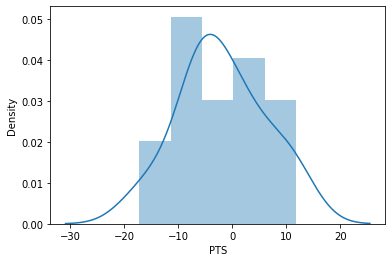

In [62]:
import seaborn as sns
sns.distplot((answer-predict))
plt.show

In [63]:
print(len(X_test))
print(len(answer-predict))

17
17


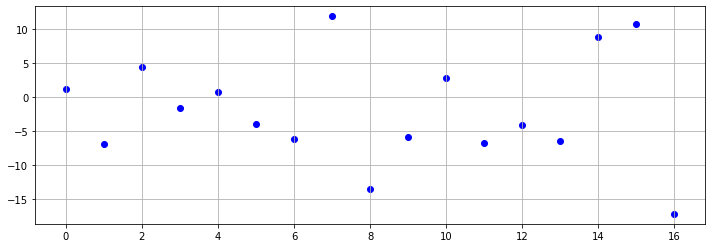

In [64]:
#residuals
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.grid()
plt.scatter(np.arange(len(X_test)), (answer-predict), color='blue')
plt.show()

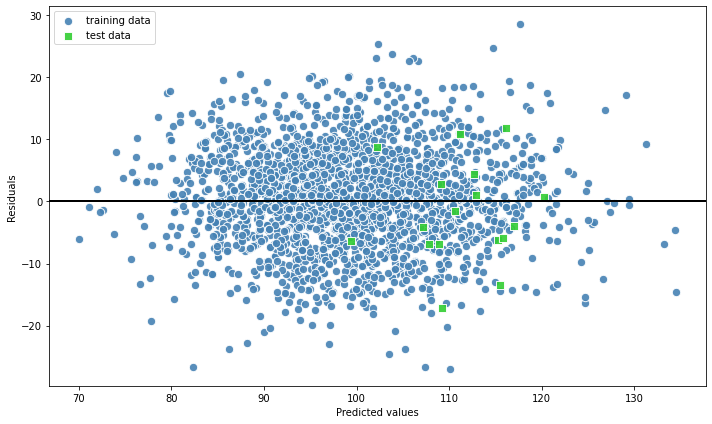

In [65]:
plt.figure(figsize=(10, 6))

plt.scatter(y_hat,   y_hat - y, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=70,
            alpha=0.9,
            label='training data')


plt.scatter(predict,  
            answer-predict, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=70,
            alpha=0.9,
            label='test data')



plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, lw=2, color='black')
plt.tight_layout()

# plt.savefig('images/10_14.png', dpi=300)
plt.show()

In [66]:
#Step7: Prediction and Decision Making¶

In [67]:
residual = y_hat - y
residual.mean(), residual.std()
std_res = (residual-residual.mean())/residual.std()
print(std_res)

17      3.112152
18     -0.212825
19      1.137336
20      0.325088
21     -1.916308
          ...   
2285    0.057502
2286   -0.016123
2287    0.738618
2288    0.069082
2289   -0.588577
Name: PTS, Length: 2246, dtype: float64


In [68]:
new_res =  answer-predict
new_std_res = (new_res - residual.mean())/residual.std()

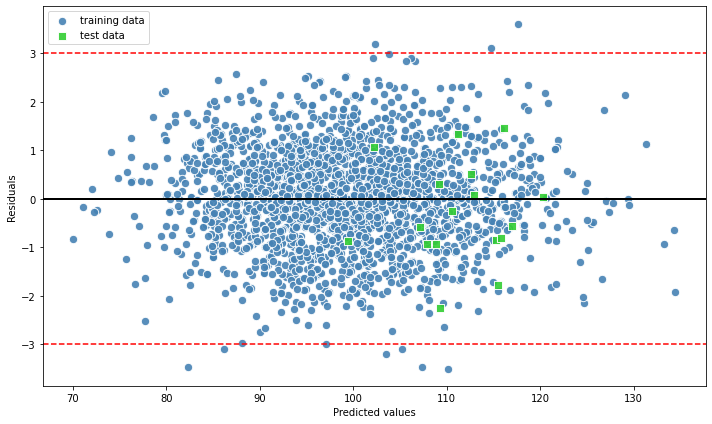

In [69]:
plt.figure(figsize=(10, 6))

plt.scatter(y_hat,    std_res, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=70,
            alpha=0.9,
            label='training data')


plt.scatter(predict,  
            new_std_res, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=70,
            alpha=0.9,
            label='test data')

plt.axhline(0, color="red")
plt.axhline(3, color="red", linestyle="dashed")
plt.axhline(-3, color="red", linestyle="dashed")
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, lw=2, color='black')
plt.tight_layout()

# plt.savefig('images/10_14.png', dpi=300)
plt.show()

# 複回歸

In [70]:
print(train.columns)
print('-'*100)
print(test.columns)

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'year', 'Home',
       'Player', 'MA_5_PTS', 'MA_5_FG_PCT', 'MA_5_FGM', 'MA_5_FGA',
       'MA_5_FG3M', 'MA_5_FG3A', 'MA_5_FTM', 'MA_5_AST', 'MA_5_PLUS_MINUS',
       'MA_5_REB', 'MA_5_STL', 'MA_5_BLK', 'MA_5_TOV', 'MA_5_PF', 'Last_PTS',
       'MA_5_PTS_by_player', 'MA_5_FG_PCT_by_player', 'MA_5_FGM_by_player',
       'MA_5_FGA_by_player', 'MA_5_FG3M_by_player', 'MA_5_FG3A_by_player',
       'MA_5_FTM_by_player', 'MA_5_AST_by_player', 'MA_5_PLUS_MINUS_by_player',
       'MA_5_REB_by_player', 'MA_5_STL_by_player', 'MA_5_BLK_by_player',
       'MA_5_TOV_by_player', 'MA_5_PF_by_player', 'Last_PTS_player',
       'Last_WL'],
      dtype='object')
-------------------------------------------------------------

In [71]:
# final muti-linear regression model
cols=['MA_5_FG_PCT', 'MA_5_FG_PCT_by_player', 'MA_5_PTS','MA_5_FGM', 'MA_5_FTM']
# 看22  RANK值
p = len(cols)
new_X_train = train[cols] 
new_X_test = test[cols]
lm = LinearRegression()

# fit the model 
lm.fit(new_X_train, y) #建立 model
print('intercept =', lm.intercept_ )
print('Coef =', lm.coef_)

# Find the R^2
r2_train = lm.score(new_X_train, y)
r2_test = lm.score(new_X_test, y_test)
print('The R-square for train is: ', r2_train )
print('The R-square for test is: ', r2_test )

r2_adj = 1 - ((1 - r2_test) * ((y_test.shape[0] - 1)/(y_test.shape[0] - p -1)) )
print('The Adjusted R^2 for test is: ' + str(r2_adj))

#預測
Y_hat = lm.predict(new_X_test) 
from sklearn.metrics import mean_squared_error
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(y_test, Y_hat))

intercept = -21.419065922089217
Coef = [-49.42773753  91.56478818   1.06606665  -0.07931919  -0.06656541]
The R-square for train is:  0.5559099262710794
The R-square for test is:  0.2607196608610306
The Adjusted R^2 for test is: -0.07531685692941004
The mean square error of price and predicted value using multifit is:  66.7040627106843
